In [1]:
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
import seaborn as sns

seed = 232
np.random.seed(seed)
tf.random.set_seed(seed)
input_path = '/Users/miloszwloch/Downloads/chest_xray/'

## Początkowe wykresy danych

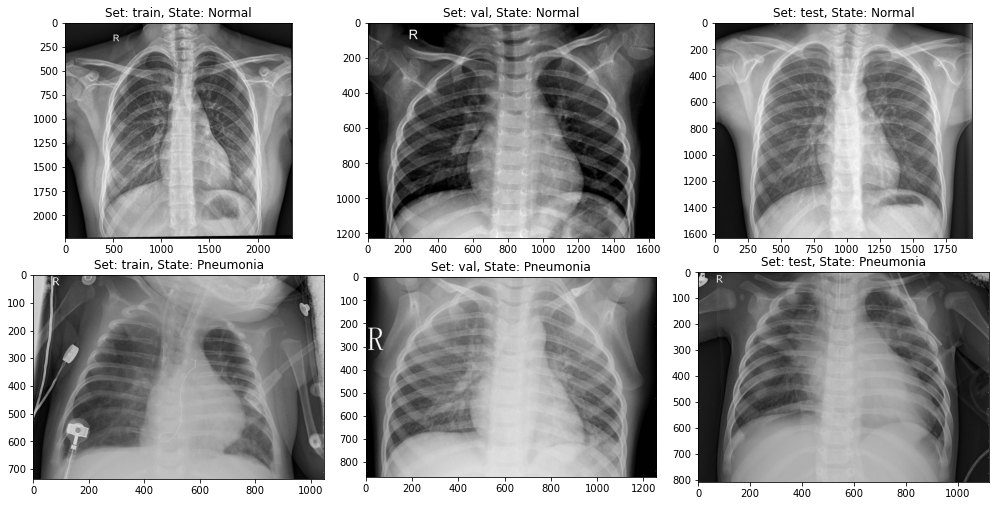

In [2]:
#plotting exemplary images from dataset

fig, ax = plt.subplots(2, 3, figsize=(14, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _type in enumerate(['train', 'val', 'test']):
    
    set_path = input_path +_type
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+ os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, State: Normal'.format(_type))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, State: Pneumonia'.format(_type))

## Przygotowanie danych

In [3]:
img_size = 150
labels = ["NORMAL","PNEUMONIA"]

def data_prep(data_dir):
    data =[]
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            if(img.endswith('.jpeg')):
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
                resize_arr = cv2.resize(img_arr,(img_size,img_size))
                data.append([resize_arr,class_num])
            
    return np.array(data)

In [4]:
def train_val_stats(history):
    epochs = [i for i in range(10)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)

    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Testing Accuracy & Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

In [5]:
train = data_prep('/Users/miloszwloch/Downloads/chest_xray/train')
test = data_prep('/Users/miloszwloch/Downloads/chest_xray/test')
val = data_prep('/Users/miloszwloch/Downloads/chest_xray/val')

/var/folders/fb/m77mz3nd5tld_1lfknzqgvbw0000gn/T/ipykernel_4572/1177670303.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


/Users/miloszwloch/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

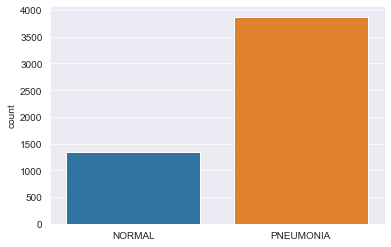

In [6]:
#plotting number of samples of each class - the dataset is imbalanced
count = []
for cnt in train:
    if (cnt[1]==0):
        count.append("NORMAL")
    else:
        count.append("PNEUMONIA")

sns.set_style('darkgrid')
sns.countplot(count)

In [7]:
for features, label in train:
    print(label)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [8]:
x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

for features, label in train:
    x_train.append(features)
    y_train.append(label)
    
for features, label in test:
    x_test.append(features)
    y_test.append(label)

    
for features, label in val:
    x_val.append(features)
    y_val.append(label)

In [9]:
# Normalizing the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255

In [10]:
# Reshaping the data
# using RGB image that is why used 3 if it was greyscale image then it would be 1
channels = 3
x_train = x_train.reshape(-1,img_size,img_size,channels)
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

x_test = x_test.reshape(-1,img_size,img_size,channels)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

x_val = x_val.reshape(-1,img_size,img_size,channels)
y_val = np.array(y_val)
y_val = y_val.reshape(-1,1)

In [11]:
x_train.shape

(5216, 150, 150, 3)

## Augmentacja danych za pomocą ImageGeneratora

In [ ]:
# alternative way of preparing data
def data_aug(img_dimensions, batch_size, class_mode):
    #manipulacja danymi
    #vertical_flip=True
    train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=10,width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.4,1.5])
    test_val_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=10,width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.4,1.5])
    
    # generator danych jest wejściem do sieci
    #generator danych treningowych 
    train_gen = train_datagen.flow_from_directory(
    directory=input_path+'train', 
    target_size=(img_dimensions, img_dimensions), 
    batch_size=batch_size, 
    class_mode=class_mode, 
    shuffle=True)

    #generator danych testowych
    test_gen = test_val_datagen.flow_from_directory(
    directory=input_path+'test', 
    target_size=(img_dimensions, img_dimensions), 
    batch_size=batch_size, 
    class_mode=class_mode, 
    shuffle=True)
    
    # zbiór testowy do obliczania metryk
    test_data = []
    test_labels = []
    

    for cond in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(input_path + 'test' + cond)):
            img = plt.imread(input_path+'test'+cond+img)
            img = cv2.resize(img, (img_dimensions, img_dimensions))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond=='/NORMAL/':
                label = 0
            elif cond=='/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    return train_gen, test_gen, test_data, test_labels

In [ ]:
datagen = ImageDataGenerator(
        rescale=1./255, zoom_range=0.3, rotation_range=10,width_shift_range=0.2, height_shift_range=0.2,brightness_range=[0.4,1.5])

datagen.fit(x_train)

## Modele

## 5-cio blokowy CNN

In [ ]:
#Model CNN with 5 convolution blocks - model_1
img_dims = 150
inputs = Input(shape=(img_dims, img_dims, 3))

# 1 blok konwolucyjny
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# 2 blok konwolucyjny
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
# 3 blok konwolucyjny
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)


# 4 blok konwolucyjny
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# 5 blok konwolucyjny
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = SeparableConv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.2)(x)

# Warstwa spłaszczająca
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(rate=0.7)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(rate=0.3)(x)

# Output layer
output = Dense(units=1, activation='sigmoid')(x)



## Resnet-18

In [ ]:
"""
ResNet-18
Reference:
[1] K. He et al. Deep Residual Learning for Image Recognition. CVPR, 2016
"""


from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)
            
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="sigmoid")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

## DenseNet201

In [ ]:
#DenseNet201 model
img_dims=150
from tensorflow.keras.applications import DenseNet121
epochs = 10
batch_size=32
inputs = Input(shape=(img_dims, img_dims, 3))

model_densetnet = tf.keras.applications.DenseNet201(input_tensor=inputs,input_shape=(img_dims,img_dims,3),include_top=False,weights='imagenet',pooling='avg')
model_densetnet.trainable = False
input = model_densetnet.input

x = model_densetnet.output
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

In [ ]:
#Xception
img_dims=150
from tensorflow.keras.applications import InceptionV3
epochs = 10
batch_size=32
inputs = Input(shape=(img_dims, img_dims, 3))

model_densetnet = tf.keras.applications.InceptionV3(input_tensor=inputs,input_shape=(img_dims,img_dims,3),include_top=False,weights='imagenet',pooling='avg')
model_densetnet.trainable = False
input = model_densetnet.input

x = model_densetnet.output
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

# Tworzenie i kompilowanie modeli

In [ ]:
# Creating model and compiling
model_1 = Model(inputs=inputs, outputs=output)
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [ ]:
#compiling ResNet18
model_2 = ResNet18(1)
model_2.build(input_shape = (None,150,150,3))
model_2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
#model_2.summary()

In [ ]:
model_3 = tf.keras.Model(inputs=input, outputs=output)

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_4 = tf.keras.Model(inputs=input, outputs=output)

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_11 = Model(inputs=inputs, outputs=output)
model_11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_22 = ResNet18(1)
model_22.build(input_shape = (None,150,150,3))
model_22.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_33 = tf.keras.Model(inputs=input, outputs=output)

model_33.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Trenowanie modeli

Pierwszy sposób augmentacji

In [ ]:
#training model_1
STEPS = len(x_train) / 32
hist_1 = model_1.fit(
           datagen.flow(x_train,y_train,batch_size = 32), steps_per_epoch=STEPS, 
           epochs=10, validation_data=datagen.flow(x_test, y_test),
              callbacks=[checkpoint, lr_reduce])

In [ ]:
#training model_2
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
STEPS = len(x_train) / 32
batch_size = 32
hist_2 = model_2.fit(datagen.flow(x_train,y_train,batch_size = 32), steps_per_epoch=STEPS, batch_size = 32, epochs=10, validation_data = datagen.flow(x_test, y_test),callbacks=[learning_rate_reduction])

In [ ]:
#training model_3
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
STEPS = len(x_train) / 32
batch_size = 32
hist_3 = model_3.fit(
    datagen.flow(x_train,y_train,batch_size = 32), steps_per_epoch=STEPS, batch_size = 32, epochs=10, validation_data = datagen.flow(x_test, y_test),callbacks=[learning_rate_reduction])

In [ ]:
#training model_4
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
STEPS = len(x_train) / 32
batch_size = 32
hist_4 = model_4.fit(
    datagen.flow(x_train,y_train,batch_size = 32), steps_per_epoch=STEPS, batch_size = 32, epochs=20, validation_data = datagen.flow(x_test, y_test),callbacks=[learning_rate_reduction])

Drugi sposób augmentacji

In [ ]:
img_dims = 150
epochs = 10
batch_size = 32
train_gen, test_gen, test_data, test_labels = data_aug(img_dims, batch_size, "binary")
# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')

In [ ]:
hist_11 = model_11.fit(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen,
           validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

In [ ]:
hist_22 = model_22.fit(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen,
           validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

In [ ]:
#training DenseNet201 on X-Ray dataset
hist_33 = model_33.fit(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen,
           validation_steps=test_gen.samples // batch_size, callbacks=[checkpoint, lr_reduce])

##  Evaluating models

In [ ]:
#model_1 evaluation
model_1.evaluate(x_test, y_test)
train_val_stats(hist_1)

In [ ]:
#model_2 evaluation
model_2.evaluate(x_test, y_test)
train_val_stats(hist_2)

In [ ]:
#model_3 evaluation
model_3.evaluate(x_test, y_test)
train_val_stats(hist_3)

In [ ]:
#model_4 evaluation
model_4.evaluate(x_test, y_test)
train_val_stats(hist_4)

In [ ]:
#model_11 evaluation
model_11.evaluate(x_test, y_test)
train_val_stats(hist_11)

In [ ]:
#model_22 evaluation
model_22.evaluate(x_test, y_test)
train_val_stats(hist_22)

In [ ]:
#model_33 evaluation
model_33.evaluate(x_test, y_test)
train_val_stats(hist_33)

In [ ]:
model_1.save('model_1.tf')

In [ ]:
model_2.save('model_2.tf')

In [ ]:
model_3.save('model_3.tf')

In [ ]:
model_4.save('model_7.tf')

In [ ]:
model_11.save('model_4.tf')

In [ ]:
model_22.save('model_5.tf')

In [ ]:
model_33.save('model_6.tf')

## ENSEMBLE LEARNING

In [ ]:
'''ensemble learning part'''
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from numpy import dstack
 
# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'model_' + str(i + 1) + '.tf'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models
 
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
    stackX = None
    for model in members:
        # make prediction
        yhat = model.predict(inputX, verbose=0)
        # stack predictions into [rows, members, probabilities]
        if stackX is None:
            stackX = yhat
        else:
            stackX = dstack((stackX, yhat))
    # flatten predictions to [rows, members x probabilities]
    stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
    return stackX
 
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # fit standalone model
    model = LogisticRegression()
    model.fit(stackedX, inputy)
    return model
 
# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
    # create dataset using ensemble
    stackedX = stacked_dataset(members, inputX)
    # make a prediction
    yhat = model.predict(stackedX)
    return yhat
 
# generate 2d classification dataset
trainX,testX = x_train, x_test
trainy,testy = y_train, y_test
# load all models
n_members = 7
members = load_all_models(n_members)
print('Loaded %d models' % len(members))
# evaluate standalone models on test dataset


In [ ]:
for n,model in enumerate(members):
    testy_enc = to_categorical(testy, num_classes=2)
    _, acc = model.evaluate(testX, testy)
    print('Model Accuracy: %.3f' % acc)
# fit stacked model using the ensemble
model = fit_stacked_model(members, testX, testy)
# evaluate model on test set
yhat = stacked_prediction(members, model, testX)
acc = accuracy_score(testy, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

predictions = stacked_prediction(members, model, testX)

accuracy = accuracy_score(testy, np.round(predictions))*100
confusion_mat = confusion_matrix(testy, np.round(predictions))
tn, fp, fn, tp = confusion_mat.ravel()

print('CONFUSION MATRIX')
print(confusion_mat)

print('\nOTHER METRICS')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(accuracy))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
res = roc_auc_score(test_labels, predictions, multi_class=1)
print(f'ROC-AUC score: {res}')

In [ ]:
model.save('modelo.tf')